In [64]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.circuit.library import MCXGate
import qiskit.tools.jupyter
%qiskit_job_watcher 

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()
backend = provider.get_backend('simulator_statevector')

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

ibmqfactory.load_account:WARNING:2022-10-20 12:51:21,068: Credentials are already in use. The existing account in the session will be replaced.


In [53]:
#階乘函式
def factorial(num):
    if num == 0:
        return 1
    else:
        a = 1
        for i in range(1,num+1):
            a = a*i
        return a

In [54]:
#定義complete graph大小
graphSize = 4
edgeNumbers = (graphSize)*(graphSize-1)//2
answerNumber = factorial(graphSize-1)//2
groverTimes = int(( 3.14/4*(2**edgeNumbers/answerNumber)**(1/2) )//1)

#print(answerNumber, edgeNumbers)

In [55]:
#choosing state
def choose(a, b):
    oracle = QuantumCircuit(6, name = 'choose state')
    zGate = MCXGate(5)
    oracle.x([a,b])
    oracle.h([5])
    oracle.append(zGate, [0,1,2,3,4,5])
    oracle.h([5])
    oracle.x([a,b])
    return oracle


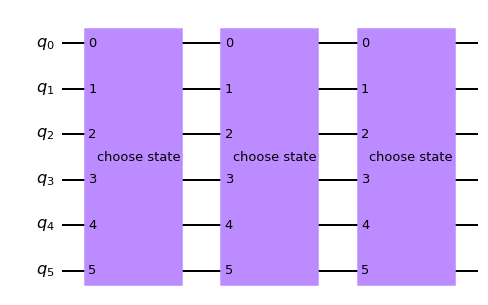

In [56]:
#oracle
oracle = QuantumCircuit(6, name = 'oracle')
oracle.append(choose(1,4), [0,1,2,3,4,5])
oracle.append(choose(2,3), [0,1,2,3,4,5])
oracle.append(choose(0,5), [0,1,2,3,4,5])

oracle.draw(output='mpl')

In [57]:
# diffuser
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

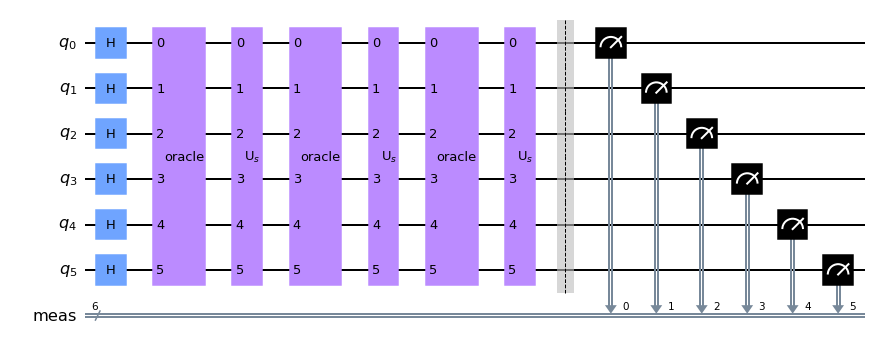

In [58]:
#quantum circuit
qc = QuantumCircuit(edgeNumbers)
for i in range(edgeNumbers):
    qc.h(i)
for j in range(groverTimes):
    qc.append(oracle, [0,1,2,3,4,5])
    qc.append(diffuser(6), [0,1,2,3,4,5])
    
qc.measure_all()
qc.draw(output='mpl')

In [68]:
job = backend.run(transpile(qc, backend=backend), shots=30)
print(job.job_id())

63514482eaab7b1cda4e78e6


In [67]:
job = backend.retrieve_job('63514466493429a924733e43') # your job id here